# Partie 1: Questions théoriques

1. Le théorème qui nous autorise à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles est la loi des grands nombres.


2. Soit $\textbf{Z}$ le vecteur aléatoire gaussien correspondant aux points de discrétisation sans observation, soit $\tilde{Z}$ celui correspondant aux points d'observation. On cherche ici à déterminer la loi de  $\textbf{Z}|\tilde{Z}= \tilde{z}$. 
En notant:

\begin{equation}
A=(Z(x_1), ..., Z(x_{N-n}), Z(x_{j1}), ..., Z(x_{jn})) \\
\end{equation}
On a alors comme matrice de covariance de $A$:
\begin{equation}
\Sigma_A =  \begin{pmatrix} \Sigma_Z & \Sigma_{Z,\tilde{Z}} \\ \Sigma_{\tilde{Z},Z} & \Sigma_\tilde{Z} \end{pmatrix} \\
\end{equation}

avec:

\begin{equation}
 \Sigma_Z = Cov(Z,Z) \\ \Sigma_{Z,\tilde{Z}} = Cov(Z, \tilde{Z})\\ \Sigma_{\tilde{Z}, Z} = Cov(\tilde{Z}, Z)\\ \Sigma_\tilde{Z} = Cov(\tilde{Z}, \tilde{Z})
\end{equation}
 
On sait alors que $ Z|\tilde{Z}=\tilde{z}$ est gaussienne d'espérance: 

\begin{equation} m_{Z|\tilde{Z}=\tilde{z}} = m_{Z} + \Sigma_{Z,\tilde{Z}}\Sigma^{-1}_{\tilde{Z}}(\tilde{z} - m_{\tilde{Z}}) 
\end{equation}

Et que sa matrice de covariance est la matrice suivante: 

\begin{equation}  
\Sigma_{Z|\tilde{Z}=\tilde{z}} = \Sigma_Z - \Sigma_{Z, \tilde{Z}}\Sigma_{\tilde{Z}}^{-1}\Sigma_{\tilde{Z},Z}
\end{equation}


3. $Z$ est un vecteur gaussien ayant une espérance de $m$ et ayant pour matrice de covariance la matrice $M = R~^{t}R$, ce qui définit sa loi.


4. Un algorithme de simulation conditionnelle pourrait reposer sur la génération aléatoire d'un vecteur gaussien $Y$ par la méthode de Box-Muller. Il suffirait ensuite d'en déduire une variable aléatoire $Z = m_{Z|Z'=z'} + RY$, avec $R$ qui vérifie la condition: $R~^{t}R = \Sigma_Z - \Sigma_{Z, Z'}\Sigma_Z'^{-1}\Sigma_{Z',Z}$.

# Partie 2: Implémentation

## Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


In [90]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta

#Paramètres du modèle
GLOB_mu=-5
GLOB_a = 50
GLOB_sigma2 = 12

#Données
observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées
unknown_indexes = np.array(list((set(discretization_indexes)-set(observation_indexes))))

In [94]:
#Question 1

from math import exp

C = lambda h, a, s_squarred: s_squarred * exp(-abs(h) / a)

vect_C = np.vectorize(C)

def get_mat_cov(M, a = GLOB_a, s_squarred = GLOB_sigma2):
    return vect_C(M, a, s_squarred)

In [95]:
#Question 2
#On considère que la matrice des distances est A = (a_{i,j}) avec a_{i,j} = x_{i} - x_{j} = Delta*(i-j)

from itertools import product

mat_dist = np.ones((N, N)) * Delta

def line_diff_multiplication(M): 
    """Prend une matrice A = (a_{i,j}) et renvoie B = (b_{i,j}) avec b_{i,j} = (i-j)*a_{i,j}. Change également A en B"""
    li, co = M.shape
    for i, j in product(range(li), range(co)):
        M[i, j] *= i - j
    return M

line_diff_multiplication(mat_dist)
mat_dist

array([[   0.,   -5.,  -10., ..., -490., -495., -500.],
       [   5.,    0.,   -5., ..., -485., -490., -495.],
       [  10.,    5.,    0., ..., -480., -485., -490.],
       ...,
       [ 490.,  485.,  480., ...,    0.,   -5.,  -10.],
       [ 495.,  490.,  485., ...,    5.,    0.,   -5.],
       [ 500.,  495.,  490., ...,   10.,    5.,    0.]])

In [96]:
#Question 3

mat_cov = get_mat_cov(mat_dist)
mat_cov

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        6.65419193e-04, 6.02096185e-04, 5.44799157e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        7.35401941e-04, 6.65419193e-04, 6.02096185e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       ...,
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [6.02096185e-04, 6.65419193e-04, 7.35401941e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [5.44799157e-04, 6.02096185e-04, 6.65419193e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

In [100]:
#Question 4

n = len(observation_indexes)
p = len(unknown_indexes)

distance_obs = np.ones((n, n))
for i, x in enumerate(observation_indexes):
    for j, y in enumerate(observation_indexes):
        distance_obs[i, j] += (x - y)*Delta
mat_cov_known = get_mat_cov(distance_obs)

distance_obs_inc = np.zeros((p, n))
for i, x in enumerate(unknown_indexes):
    for j, y in enumerate(observation_indexes):
        distance_obs_inc[i, j] += (x - y)*Delta
mat_cov_mix  = get_mat_cov(distance_obs_inc)

distance_inc = np.zeros((p, p))
for i, x in enumerate(unknown_indexes):
    for j, y in enumerate(unknown_indexes):
        distance_inc[i, j] += (x - y)*Delta
mat_cov_unknown = get_mat_cov(distance_inc)

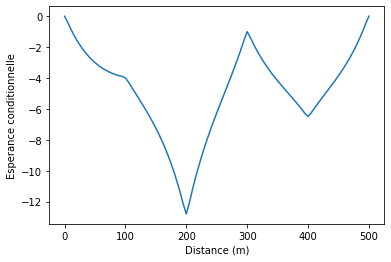

In [144]:
#Question 5

#On utilise l'égalité de la question théorique 2:

x = np.dot(np.linalg.inv(mat_cov_known), (depth - np.ones((n)) * GLOB_mu))
m_cond = np.ones((p)) * GLOB_mu + np.dot(mat_cov_mix, x)

def add_known(v_cond):
    vect_esp = []
    count_m = 0
    count_known =0
    for i in range(N):
        if i in observation_indexes:
            vect_esp.append(depth[count_known])
            count_known += 1
        else:
            vect_esp.append(v_cond[count_m])
            count_m += 1
    return vect_esp

GLOB_distances = np.array(range(N), dtype = int) * Delta
GLOB_vect_esp_cond = m_cond
        
plt.plot(GLOB_distances, add_known(GLOB_vect_esp_cond))
plt.xlabel("Distance (m)")
plt.ylabel("Esperance conditionnelle")
plt.show()

[[ 1.96927455e+00  1.77360340e+00  1.59568307e+00 ...  1.60935803e-05
   1.45620325e-05  1.31762264e-05]
 [ 1.77173454e+00  3.75967470e+00  3.38124094e+00 ...  1.77863350e-05
   1.60936484e-05  1.45620325e-05]
 [ 1.59192665e+00  3.37937208e+00  5.20063941e+00 ...  1.96571014e-05
   1.77863350e-05  1.60935803e-05]
 ...
 [-1.64185348e-05 -1.81452872e-05 -2.00536437e-05 ...  5.20063941e+00
   3.38124094e+00  1.59568307e+00]
 [-1.48561047e-05 -1.64185348e-05 -1.81452872e-05 ...  3.37937208e+00
   3.75967470e+00  1.77360340e+00]
 [-1.34423594e-05 -1.48561047e-05 -1.64185348e-05 ...  1.59192665e+00
   1.77173454e+00  1.96927455e+00]]


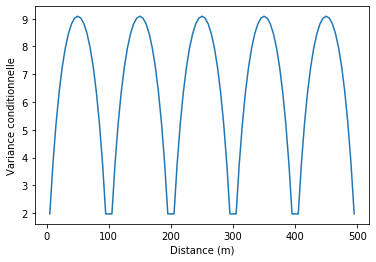

In [139]:
#Question 6

#Encore une fois, on applique la question 2

mat_cov_cond = mat_cov_unknown - np.dot(np.dot(mat_cov_mix, np.linalg.inv(mat_cov_known)), mat_cov_mix.T)
print(mat_cov_cond)
plt.plot(unknown_indexes * Delta, np.diag(mat_cov_cond))
plt.xlabel("Distance (m)")
plt.ylabel("Variance conditionnelle")
plt.show()

GLOB_mat_cov_cond = mat_cov_cond

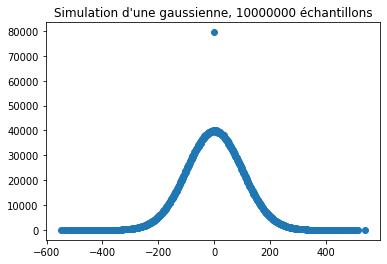

In [140]:
#Question 7

from math import log, cos, sqrt, pi
from random import random

def box_muller():
    return sqrt(-2 * log(random())) * cos(2*pi*random())

def gaussienne_a_vu(n):
    dic = {}
    for i in range(n):
        sim = int(box_muller()*100)
        if sim in dic:
            dic[sim] += 1
        else:
            dic[sim] = 1
    xs = []
    ys = []
    for key in dic:
        xs += [key]
        ys += [dic[key]]
    plt.scatter(xs, ys)
    plt.title("Simulation d'une gaussienne, " + str(n) + " échantillons")
    plt.show()

gaussienne_a_vu(10000000)    

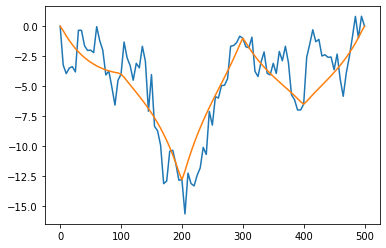

In [160]:
def vect_gauss_norm(n):
    return np.array([box_muller() for i in range(n)])

def simulation_cond(vect_esp, mat_cov):
    n = len(vect_esp)
    X = vect_gauss_norm(n)
    R = np.linalg.cholesky(mat_cov)
    return vect_esp + np.dot(X, R)

def simu_prof_cond():
    return simulation_cond(GLOB_vect_esp_cond, GLOB_mat_cov_cond)

ys = simu_prof_cond()
ys = add_known(ys)
plt.plot(GLOB_distances, ys)
plt.plot(GLOB_distances, add_known(GLOB_vect_esp_cond))
plt.show()

def simu_prof():
    return add_known(simulation_cond(GLOB_vect_esp_cond, GLOB_mat_cov_cond))

#### Commentaire:
La tendance est respectée, mais la simulation semble bruitée. Si l'on moyenne sur plusieures simulation, ce sera sans doute mieux.

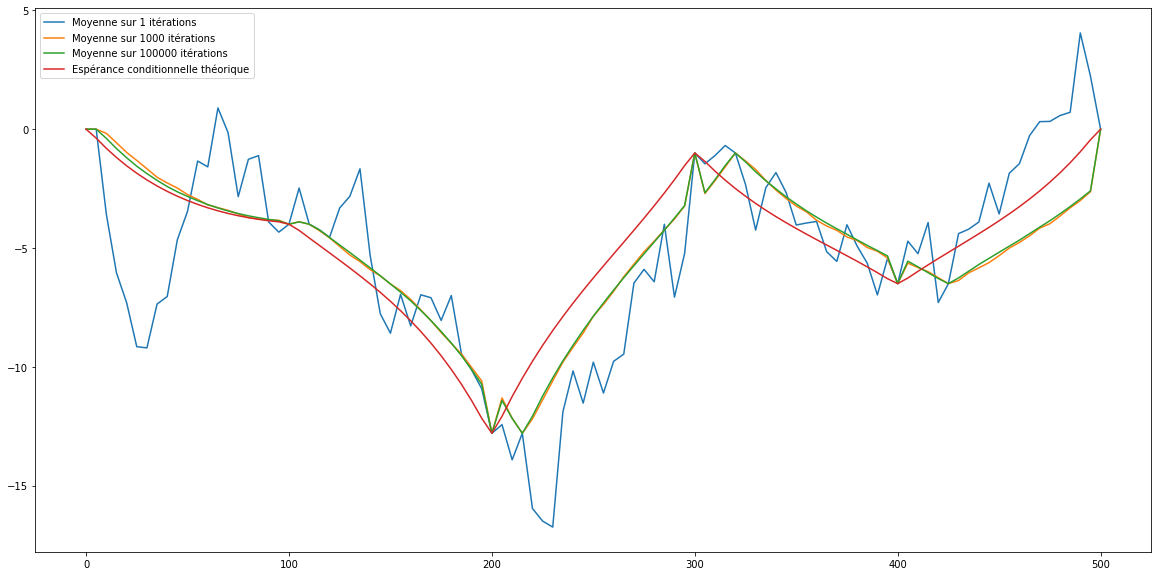

In [178]:
def avg_simu_prof(n):
    acc = np.array(simu_prof())
    for i in range(n - 1):
        acc += np.array(simu_prof())
    return acc / n

def ldgn():
    for i in [0, 3, 5]:
        n = int(10 ** i)
        plt.plot(GLOB_distances, add_known(avg_simu_prof(n)), label = "Moyenne sur " + str(n) + " itérations")
    plt.plot(GLOB_distances, add_known(GLOB_vect_esp_cond), label = "Espérance conditionnelle théorique")
    plt.legend()
    plt.show()
    
ldgn()

In [151]:
#Question 8

def longueur_cable(vect, pas):
    acc = 0
    pas2 = pas ** 2
    n = len(vect)
    for i in range(n - 1):
        acc += sqrt(pas2 + (vect[i] - vect[i+1]) ** 2)
    return acc

In [158]:
#Question 9

def simu_cable():
    return longueur_cable(simu_prof(), Delta)

def avg_simu_cable(n):
    acc = 0
    for i in range(n):
        acc += simu_cable()
    return acc / n

print(avg_simu_cable(100))
print(longueur_cable(add_known(GLOB_vect_esp_cond), Delta))

493.51438141602773
501.626106981019


Ces deux valeurs sont relativement proches.

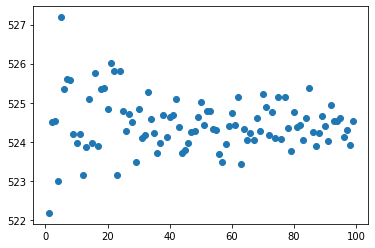

In [190]:
#Question 10

xs = [i for i in range(1, 100)]
ys = []
for x in xs:
    ys.append(avg_simu_cable(x))
plt.scatter(xs, ys)
x = longueur_cable(add_known(GLOB_vect_esp_cond), Delta)
plt.show()

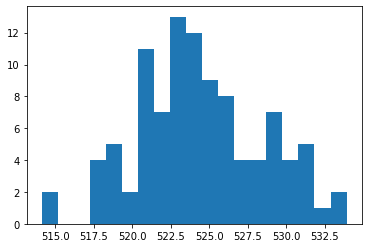

In [203]:
#Question 11

def hist(n):
    H = []
    for i in range(n):
        H += [simu_cable()]
    plt.hist(H, bins = np.linspace(min(H), max(H), 20))
    plt.show()
    
hist(100)

In [207]:
#Question 12

#Méthode expérimentale

def simu_cable_multi(n):
    return [simu_cable() for i in range(n)]
def intervalle_95_exp(n):
    l = simu_cable_multi(n)
    l.sort()
    n = int(0.95 * len(l) * 0.5)
    for i in range(n):
        l.pop()
        l.pop(0)
    return l[0], l[-1]

intervalle_95_exp(100)

(524.5971364156129, 525.3277451430713)

On peut également utiliser le fait que la longueur du cable suit une loi normale, puisque c'est une somme de fonctions appliquées à des variables gaussiennes. Il suffit de déterminer des approximations de la moyenne et de l'écart type, alors on sera à 95% sûr d'être dans l'intervalle $[\mu - \frac{\sigma}{\sqrt{n}} \times 1,96; \mu + \frac{\sigma}{\sqrt{n}} \times 1,96]$ où $n$ est le nombre de simulation.

In [208]:
#Méthode utilisant les propriétés de L

def intervalle_95_theo(n):
    l = np.array(simu_cable_multi(n))
    m = np.mean(l)
    sigma = sqrt(np.var(l))
    alpha = (sigma / sqrt(n)) * 1.96
    return m - alpha, m + alpha

intervalle_95_theo(100)

(523.9474633851015, 525.5773818297331)

In [211]:
#Question 13

#Methode expérimentale

def over_len_exp(n, maximum_len):
    l = simu_cable_multi(n)
    acc = 0
    for x in l:
        if x >= maximum_len:
            acc += 1
    return acc / n

over_len_exp(100, 525)

0.46

Sinon, on peut encore une fois utiliser le fait que L suit une loi normale, dont on connaît la fonction de densité.

In [214]:
from math import erf

def over_len_theo(n, max_len):
    l = np.array(simu_cable_multi(n))
    m = np.mean(l)
    sigma = sqrt(np.var(l))
    return 0.5*(1 + erf(-(max_len-m)**2/(2*sigma**2)))

over_len_theo(100, 525)

0.4997562113958797

In [222]:
#Question 14

def bilan(n):
    print("Pour " + str(n) + " itérations: \n")
    print("- La longueur estimée du câble est de " + str(avg_simu_cable(n)) + " mètres")
    m, M = intervalle_95_exp(n)
    print("- Selon une méthode expérimentale, la longueur du câble a 95% de chance d'être entre " + str(m) + " mètres et " + str(M) + " mètres")
    m, M = intervalle_95_theo(n)
    print("- Selon une méthode théorique, la longueur du câble a 95% de chance d'être entre " + str(m) + " mètres et " + str(M) + " mètres")
    print("- Selon une méthode expérimentale, la longueur du câble a une probabilité de " + str(over_len_exp(n, 525)) + " d'être supérieure à 525 mètres")
    print("- Selon une méthode théorique, la longueur du câble a une probabilité de " + str(over_len_exp(n, 525)) + " d'être supérieure à 525 mètres")
    print("\n\n")
    
bilan(100)
bilan(1000)
bilan(10000)
bilan(100000)

Pour 100 itérations: 

- La longueur estimée du câble est de 524.5309146454508 mètres
- Selon une méthode expérimentale, la longueur du câble a 95% de chance d'être entre 524.0793200228173 mètres et 524.8308802658136 mètres
- Selon une méthode théorique, la longueur du câble a 95% de chance d'être entre 524.3303121633185 mètres et 525.7948851308317 mètres
- Selon une méthode expérimentale, la longueur du câble a une probabilité de 0.4 d'être supérieure à 525 mètres
- Selon une méthode théorique, la longueur du câble a une probabilité de 0.42 d'être supérieure à 525 mètres



Pour 1000 itérations: 

- La longueur estimée du câble est de 524.2079516672917 mètres
- Selon une méthode expérimentale, la longueur du câble a 95% de chance d'être entre 523.8687440229983 mètres et 524.2330256889943 mètres
- Selon une méthode théorique, la longueur du câble a 95% de chance d'être entre 524.080747215279 mètres et 524.521969986383 mètres
- Selon une méthode expérimentale, la longueur du câble a une

#### Commentaire:
La longueur des calculs augmente avec le nombre d'itérations, mais la précision semble plafonner après 10000.